In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import string
from wordcloud import WordCloud
from PIL import Image
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping 
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.utils.vis_utils import plot_model
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_test.csv to train_test (2).csv


In [ ]:
def clean_str(string):
    """
    Cleaning of dataset
    """
    string = re.sub(r"\\", "", string)    
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string)    
    return string.strip().lower()

In [ ]:
import io
data_train =pd.read_csv('train_test (2).csv', encoding = "ISO-8859-1", engine='python')
data_train.head()

,id,tweet,name,label
0,1,i sing my own rhythm.,sheezy0,1
1,2,I'm the author of novels filled with family dr...,DavdBurnett,1
2,3,louis whining and squealing and all,lwtprettylaugh,1
3,4,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",douggarland,1
4,5,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,WilfordGemma,1


In [ ]:
data_train=data_train.dropna()

In [ ]:
## get independent features
x= data_train.drop('label',axis=1)

In [ ]:
y=data_train['label']

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
# vocabularry size
voc_size=5000

In [ ]:
messages= x.copy()

In [ ]:
messages.reset_index(inplace=True)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Cleaning and Extracting meaningful text from tweets

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
  #keeps only words
    review = re.sub('[^a-zA-Z]', ' ', messages['tweet'][i])
  #convert to lower case and split 
    review = review.lower()
    review = review.split()
  # remove stopwords
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
 # join the cleaned words in a list
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus

['sing rhythm',
 'author novel fill famili drama romanc',
 'loui whine squeal',
 'mobil guy er shazam googl kleiner perkin yahoo sprint pc airtouch air forc stanford gsb uva dad husband brother golfer',
 'ricki wilson best frontman kaiser chief best band xxxx thank kaiser chief incred year gig memori cherish alway xxxxxxx',
 'know',
 'global marketplac imag video music share photo inspir design tip video creativ commun',
 'secret get ahead get start',
 'pll fan crazi mcd ramen bae',
 'renaiss art historian univers nottingham fuell haribo partial coffe soft spot renaiss china nation teach fellow',
 'clean food tast great provid energi nutrient guilt granola vegan paleo friendli option cert organ gf kosher',
 'highli extraordinari auction',
 'senior xi xii mmxiv',
 'come join fastest blog network onlin today http co mfpa vgk http co mpuuqtyf g cover credit repair credit card bankruptci',
 'im p bo burnham disney world',
 'jmkm',
 'enthusiast f fan model collector music fan film fanat als

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
onehot_repr= [one_hot(words,voc_size)for words in corpus]
print(onehot_repr)

[[4229, 3704], [372, 2070, 4334, 785, 170, 3155], [3363, 1907, 3627], [1509, 2060, 485, 3429, 1320, 230, 3280, 2700, 1482, 3806, 2550, 1327, 46, 2210, 2686, 3613, 700, 4865, 1933, 949], [3676, 2965, 3907, 4446, 3385, 37, 3907, 1800, 3909, 4353, 3385, 37, 220, 1176, 3988, 2963, 3470, 2738, 4051], [1799], [953, 44, 2544, 2620, 2012, 3807, 3073, 601, 1121, 4184, 2620, 285, 2180], [1993, 2996, 2569, 2996, 4349], [956, 685, 753, 788, 1943, 3303], [4435, 2167, 2986, 1939, 3951, 3698, 4154, 3183, 3336, 4120, 1400, 4435, 3045, 4148, 4634, 883], [1133, 2622, 784, 2396, 921, 2186, 3427, 1587, 1816, 3862, 1894, 1630, 312, 1766, 2631, 3668, 4157], [4810, 971, 4327], [1013, 2866, 1711, 3520], [4894, 1955, 4219, 2868, 1700, 314, 3661, 306, 1945, 757, 3894, 306, 1945, 1747, 1523, 3969, 1375, 2800, 1375, 4364, 1244], [1782, 437, 261, 4840, 4372, 2051], [3629], [4714, 1524, 685, 642, 3072, 2012, 685, 3031, 2922, 3974, 1835], [3277, 1617, 2582, 2320, 1588, 852, 2661, 2167, 2167, 4125, 1095, 3696, 4537, 

In [ ]:
sent_length=30
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...    0 4229 3704]
 [   0    0    0 ...  785  170 3155]
 [   0    0    0 ... 3363 1907 3627]
 ...
 [   0    0    0 ... 4345 1110 2595]
 [   0    0    0 ... 4058 1653 4366]
 [   0    0    0 ...  852 4519 2603]]


In [ ]:
## creating model
embedding_vector_features= 40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length)) # making embedding layer
model.add(LSTM(100))  # one LSTM Layer with 100 neurons
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 40)            200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import numpy as np
x_final= np.array(embedded_docs)
y_final= np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_final,y_final,test_size=0.33,random_state=0)

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=4,batch_size=64)

Epoch 1/4
171/171 [==============================] - 8s 47ms/step - loss: 0.0738 - accuracy: 0.9895 - val_loss: 0.0411 - val_accuracy: 0.9931
Epoch 2/4
171/171 [==============================] - 8s 44ms/step - loss: 0.0371 - accuracy: 0.9941 - val_loss: 0.0410 - val_accuracy: 0.9931
Epoch 3/4
171/171 [==============================] - 8s 46ms/step - loss: 0.0345 - accuracy: 0.9941 - val_loss: 0.0396 - val_accuracy: 0.9931
Epoch 4/4
171/171 [==============================] - 8s 46ms/step - loss: 0.0266 - accuracy: 0.9941 - val_loss: 0.0403 - val_accuracy: 0.9931


In [ ]:
y_pred= model.predict_classes(x_test)

In [ ]:
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[   0   37]
 [   0 5344]]


In [ ]:
ac= accuracy_score(y_test,y_pred)
print(ac)

0.9931239546552686


In [ ]:
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.040252380073070526
Test accuracy: 0.9931239485740662


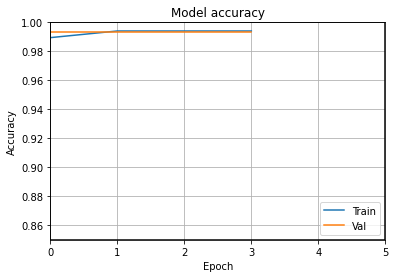

In [ ]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
axes = plt.gca()
axes.set_xlim([0,4])
axes.set_ylim([0.85,1])
axes.grid(True, which='both')
axes.axhline(y=0.85, color='k')
axes.axvline(x=0, color='k')
axes.axvline(x=4, color='k')
axes.axhline(y=1, color='k')
plt.legend(['Train','Val'], loc='lower right')
plt.show()

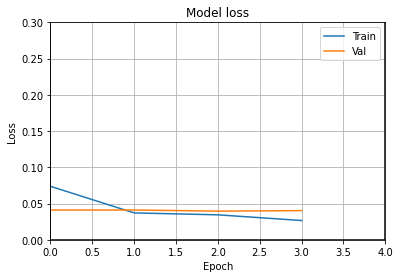

In [ ]:
# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
axes = plt.gca()
axes.set_xlim([0,4])
axes.set_ylim([0,0.3])
axes.grid(True, which='both')
axes.axhline(y=0, color='k')
axes.axvline(x=0, color='k')
axes.axhline(y=1, color='k')
axes.axvline(x=4, color='k')
plt.legend(['Train','Val'], loc='upper right')
plt.show()